In [2]:
import pandas as pd

# 데이터셋 로드
data = pd.read_csv('/Users/baejuyeon/Downloads/breast-cancer.csv')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
print("#"*10)
print("데이터의 처음 몇 줄을 출력하여 구조 확인")
print(data.head())

# 데이터의 각 컬럼에 대한 정보 확인
print("#"*10)
print("데이터의 각 컬럼에 대한 정보 확인")
print(data.info())

##########
데이터의 처음 몇 줄을 출력하여 구조 확인
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  textu

In [3]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", data.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", numerical_cols)

##########
데이터 타입 확인
Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst    

In [4]:
# 결측치 확인
print("\nMissing Values:\n", data.isnull().sum())

# 각 범주형 변수의 유니크한 값과 빈도수
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", data[col].value_counts())

# 수치형 데이터의 기초 통계
print("\nDescriptive Statistics for Numerical Data:\n", data[numerical_cols].describe())



Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Unique values in diagnosis:
 diagnosis
B

In [5]:
# 왜도와 첨도 확인
"""
왜도(Skewness): 0에 가까울수록 정규분포에 근사, 양의 값은 오른쪽 꼬리가 긴 분포(왼쪽으로 치우친), 음의 값은 왼쪽 꼬리가 긴 분포(오른쪽으로 치우친)
첨도(Kurtosis): 0에 가까울수록 정규분포에 근사, 높으면 분포가 뾰족하고, 낮으면 평평
"""

print("\nSkewness of the data:\n", data[numerical_cols].skew())
print("\nKurtosis of the data:\n", data[numerical_cols].kurt())


Skewness of the data:
 id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
conc

In [6]:
"""
상관계수 값이 1에 가까울수록 완벽한 양의 상관관계, -1에 가까울수록 완벽한 음의 상관관계를 나타냅니다.
"""

# 피어슨 상관 계수
print("Pearson Correlation:\n", data[numerical_cols].corr(method='pearson'))

# 스피어만 상관 계수
print("\nSpearman Correlation:\n", data[numerical_cols].corr(method='spearman'))

Pearson Correlation:
                                id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se         

In [7]:
from scipy import stats

"""
T-통계량의 절대값이 크면 클수록 두 그룹 간의 차이가 크다고 할 수 있습니다.

일반적으로 P-값이 0.05보다 작으면 귀무 가설을 기각하고, 통계적으로 유의미한 차이가 있음을 인정합니다
"""

# diagnosis를 기준으로 데이터 나누기
group_m = data[data['diagnosis'] == 'M'] # 악성
group_b = data[data['diagnosis'] == 'B'] # 양성

# 모든 변수를 리스트로 정의
variables = data.columns[2:] # id와 diagnosis 열을 제외한 나머지 열

results = []

# 각 변수에 대해 T-통계량 계산
for variable in variables:
    t_stat, p_val = stats.ttest_ind(group_m[variable], group_b[variable])
    results.append({
        'Variable': variable,
        'Mean(Malignant)': group_m[variable].mean(),
        'Mean (Benign)': group_b[variable].mean(),
        'Std (Malignant)': group_m[variable].std(),
        'Std (Benign)': group_b[variable].std(),
        'T-Statistic': t_stat,
        'P-Value': p_val
    })

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)

                   Variable  Mean(Malignant)  Mean (Benign)  Std (Malignant)  \
0               radius_mean        17.462830      12.146524         3.203971   
1              texture_mean        21.604906      17.914762         3.779470   
2            perimeter_mean       115.365377      78.075406        21.854653   
3                 area_mean       978.376415     462.790196       367.937978   
4           smoothness_mean         0.102898       0.092478         0.012608   
5          compactness_mean         0.145188       0.080085         0.053987   
6            concavity_mean         0.160775       0.046058         0.075019   
7       concave points_mean         0.087990       0.025717         0.034374   
8             symmetry_mean         0.192909       0.174186         0.027638   
9    fractal_dimension_mean         0.062680       0.062867         0.007573   
10                radius_se         0.609083       0.284082         0.345039   
11               texture_se         1.21

In [8]:
# P-값을 기준으로 정렬하여 가장 유의미한 변수 찾기
results_df_sorted = results_df.sort_values(by='P-Value')

# 가장 유의미한 변수 출력
most_significant_variable = results_df_sorted.iloc[0]
print("가장 유의미한 변수:")
print(most_significant_variable)

# 모든 변수에 대한 결과 출력
print("\n모든 변수에 대한 T-통계량 및 P-값:")
print(results_df_sorted)

가장 유의미한 변수:
Variable           concave points_worst
Mean(Malignant)                0.182237
Mean (Benign)                  0.074444
Std (Malignant)                0.046308
Std (Benign)                   0.035797
T-Statistic                   31.054555
P-Value                             0.0
Name: 27, dtype: object

모든 변수에 대한 T-통계량 및 P-값:
                   Variable  Mean(Malignant)  Mean (Benign)  Std (Malignant)  \
27     concave points_worst         0.182237       0.074444         0.046308   
22          perimeter_worst       141.370330      87.005938        29.457055   
7       concave points_mean         0.087990       0.025717         0.034374   
20             radius_worst        21.134811      13.379801         4.283569   
2            perimeter_mean       115.365377      78.075406        21.854653   
23               area_worst      1422.286321     558.899440       597.967743   
0               radius_mean        17.462830      12.146524         3.203971   
3                 ar

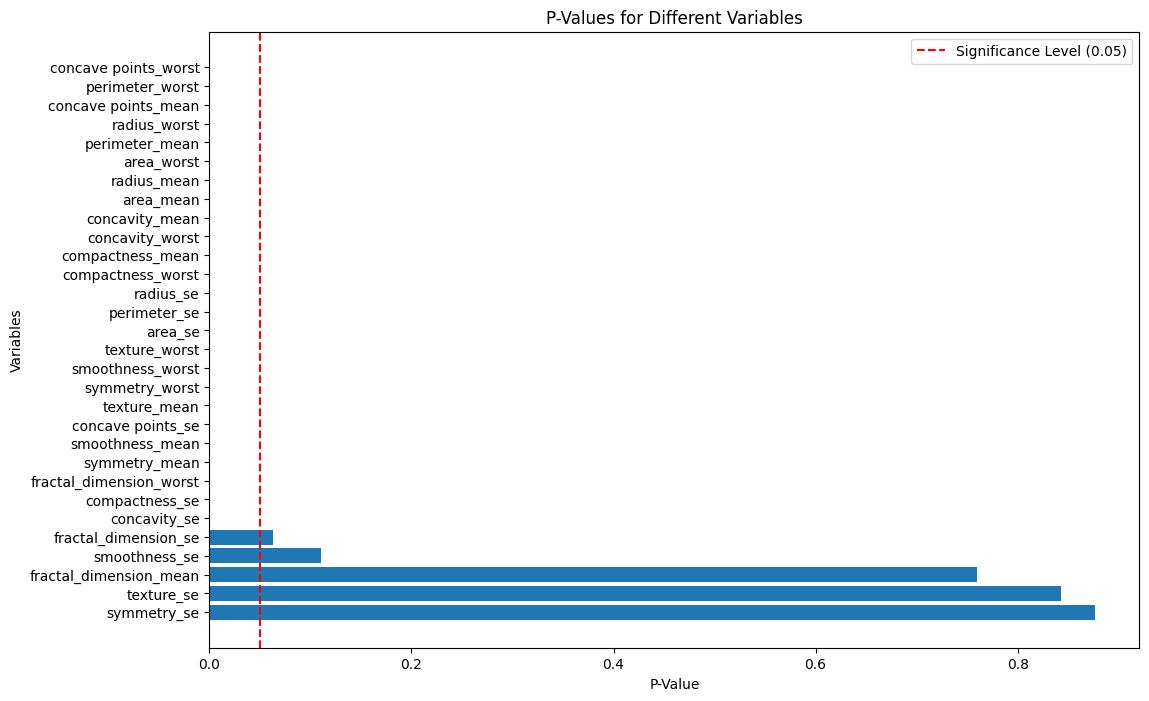

In [9]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(12, 8))
plt.barh(results_df_sorted['Variable'], results_df_sorted['P-Value'])
plt.xlabel('P-Value')
plt.ylabel('Variables')
plt.title('P-Values for Different Variables')
plt.axvline(x=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.gca().invert_yaxis()  # Y축 반전
plt.show()


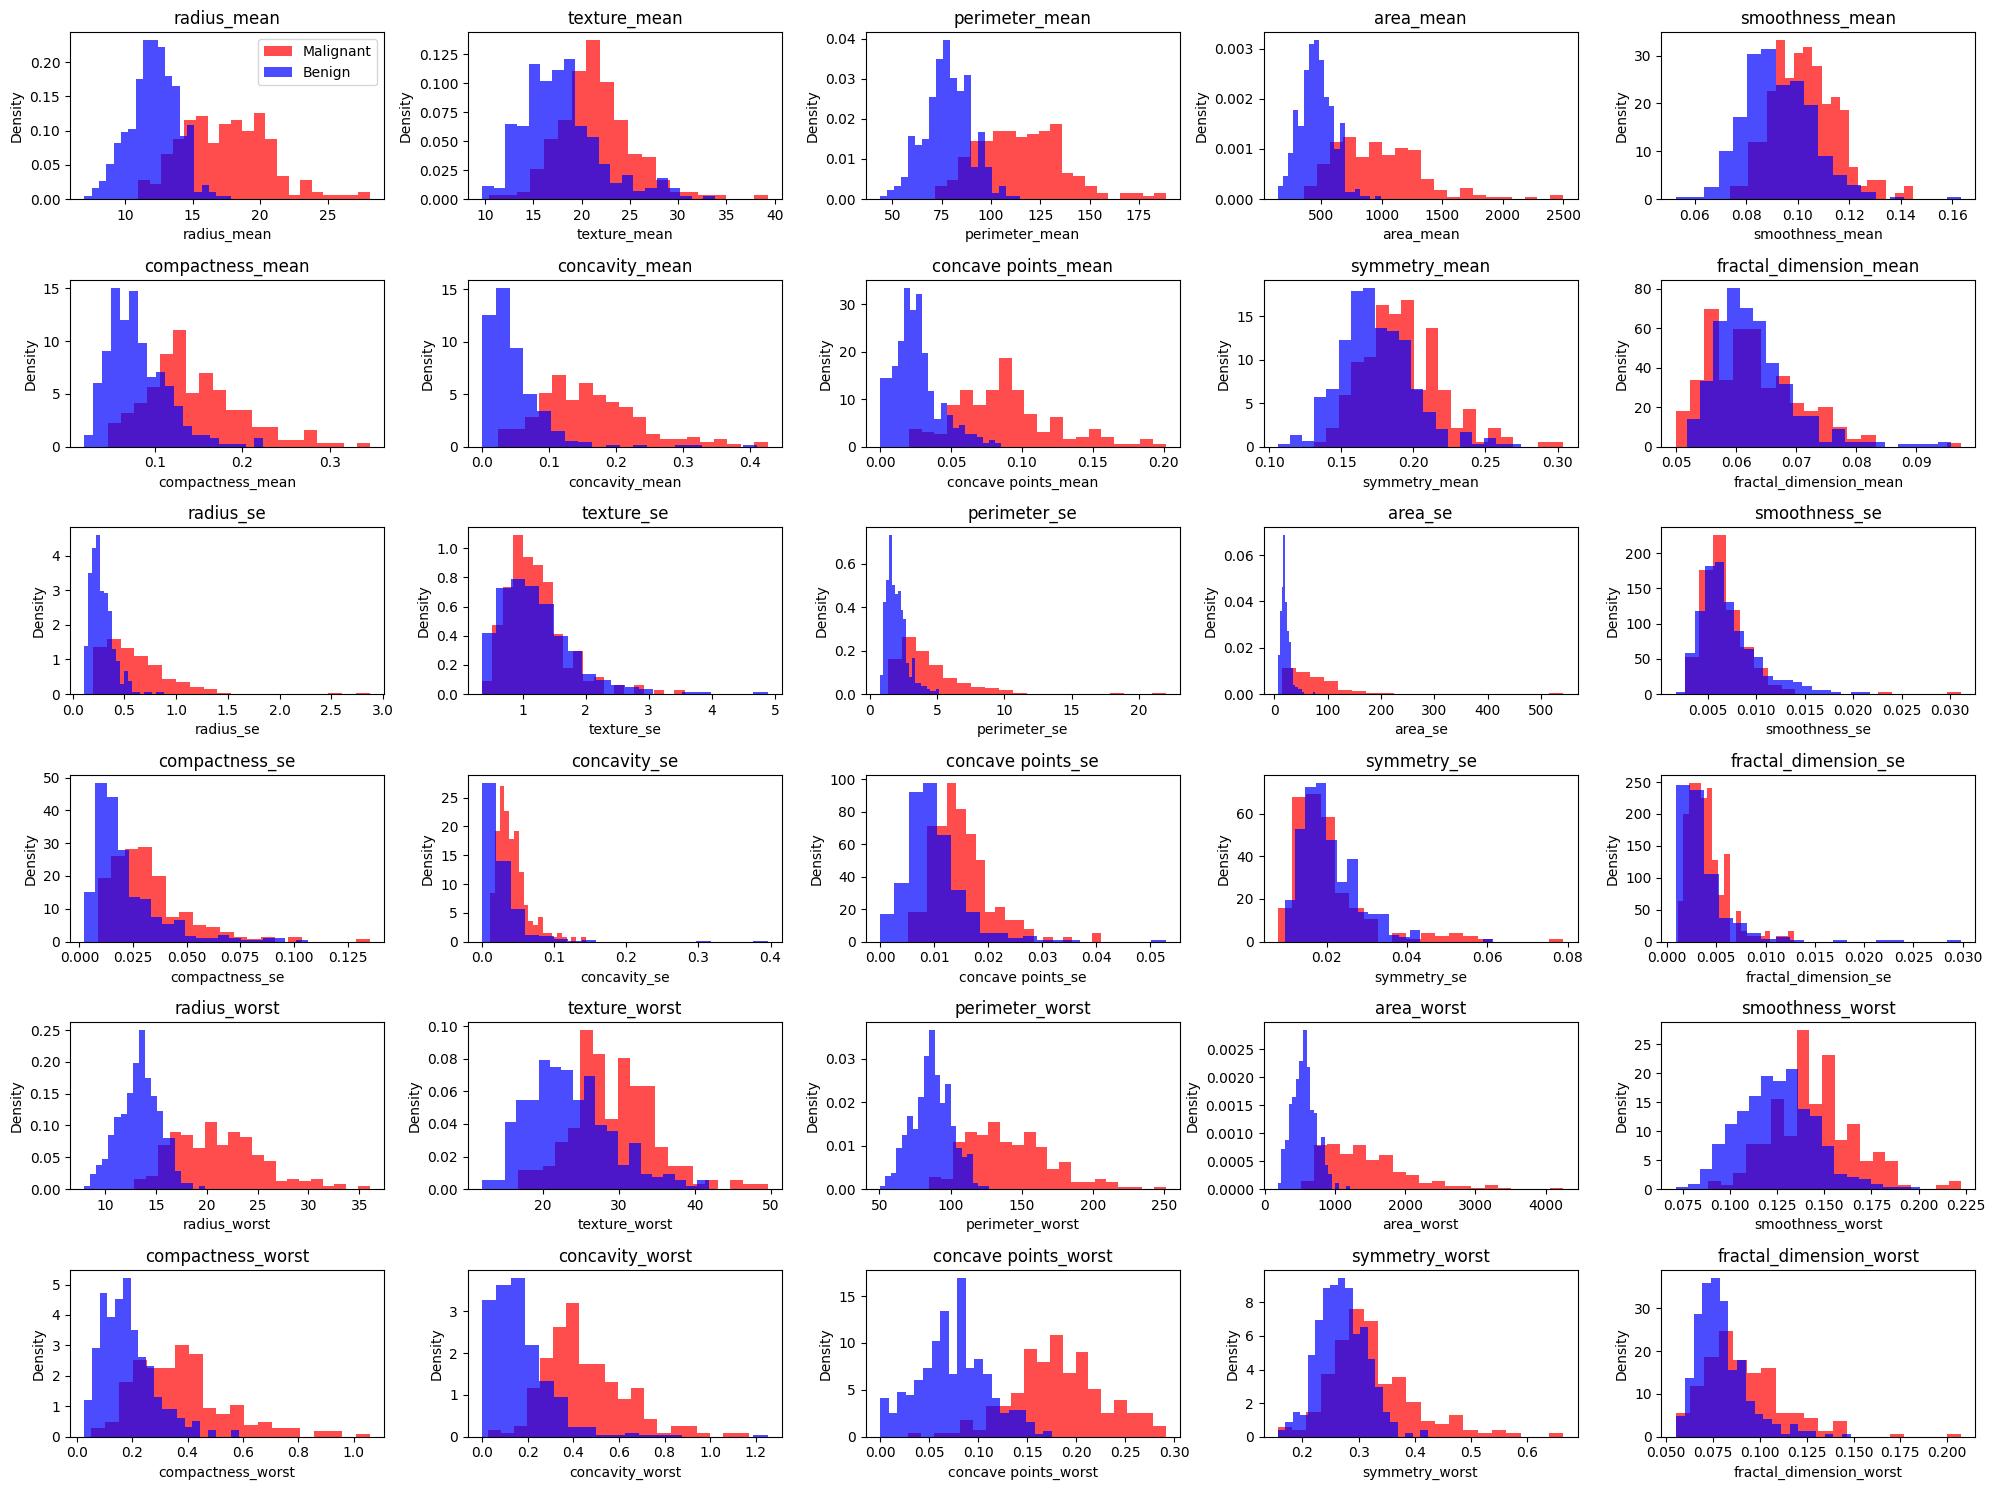

In [10]:
# 각 변수에 대해 M, B 그룹의 평균을 시각화
plt.figure(figsize=(20, 15))

for i, variable in enumerate(variables, 1):
    plt.subplot(6, 5, i)
    plt.hist(group_m[variable], bins=20, alpha=0.7, label='Malignant', color='red', density=True)
    plt.hist(group_b[variable], bins=20, alpha=0.7, label='Benign', color='blue', density=True)
    plt.title(variable)
    plt.xlabel(variable)
    plt.ylabel('Density')
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11647/1472464474.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_m[variable], group_b[variable]], labels=['Malignant', 'Benign'])
/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11647/1472464474.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_m[variable], group_b[variable]], labels=['Malignant', 'Benign'])
/var/folders/1p/4xtjstm535ldp7pq_cv7rvgh0000gn/T/ipykernel_11647/1472464474.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_m[variable], group_b[variable]], labels=['Malignant', 

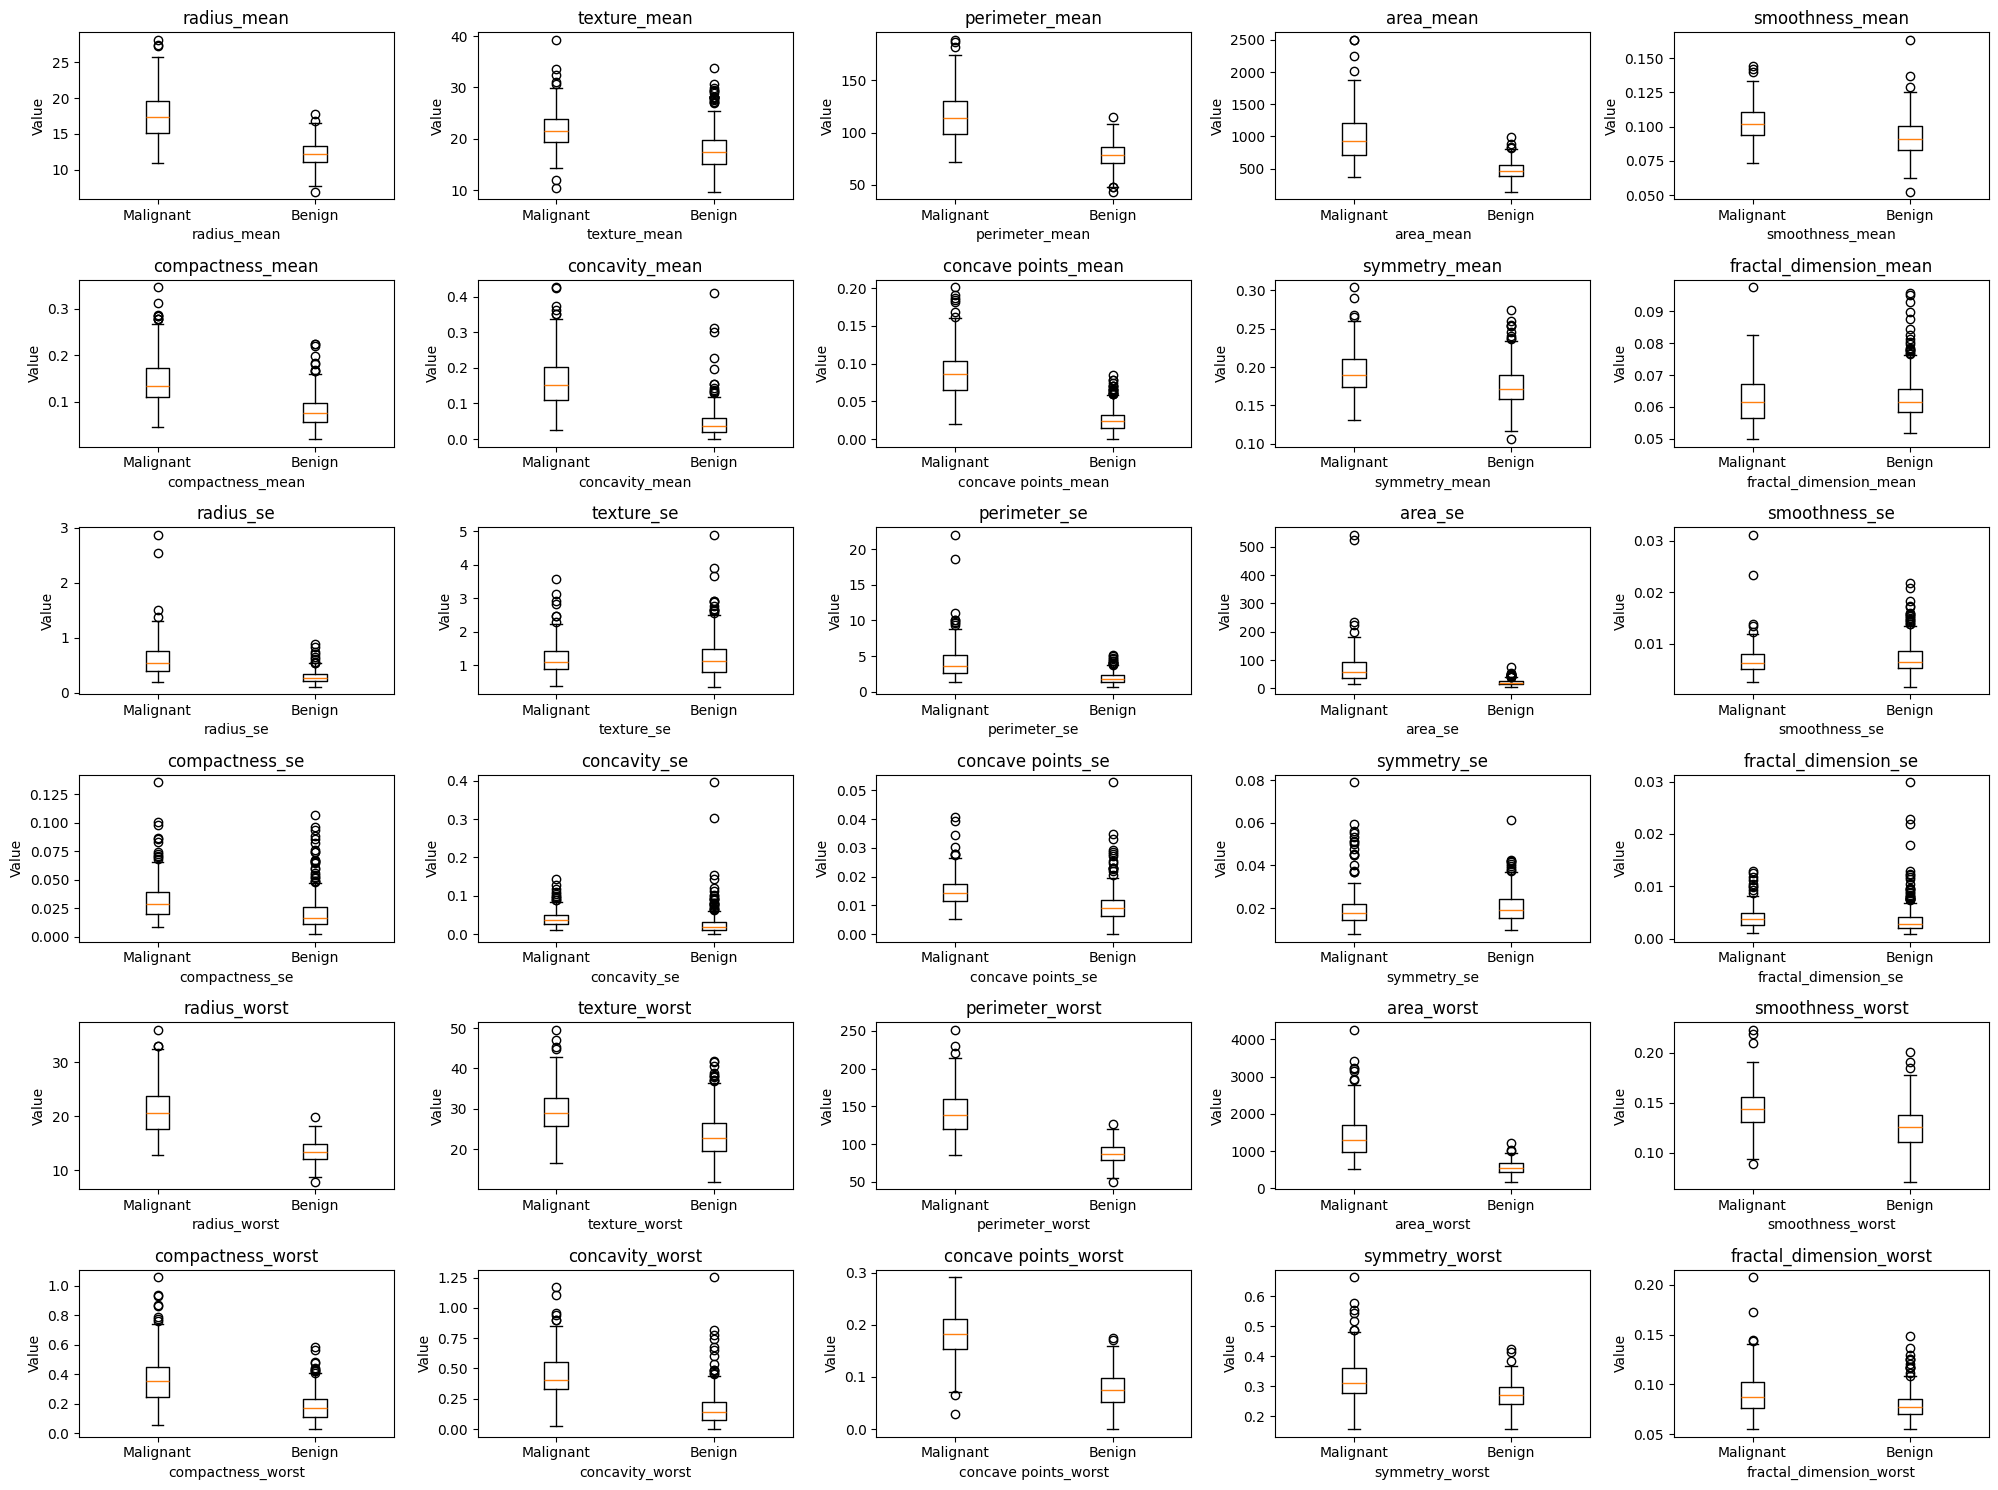

In [11]:
# 박스플롯 시각화
plt.figure(figsize=(20, 15))

for i, variable in enumerate(variables, 1):
    plt.subplot(6, 5, i)
    plt.boxplot([group_m[variable], group_b[variable]], labels=['Malignant', 'Benign'])
    plt.title(variable)
    plt.xlabel(variable)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

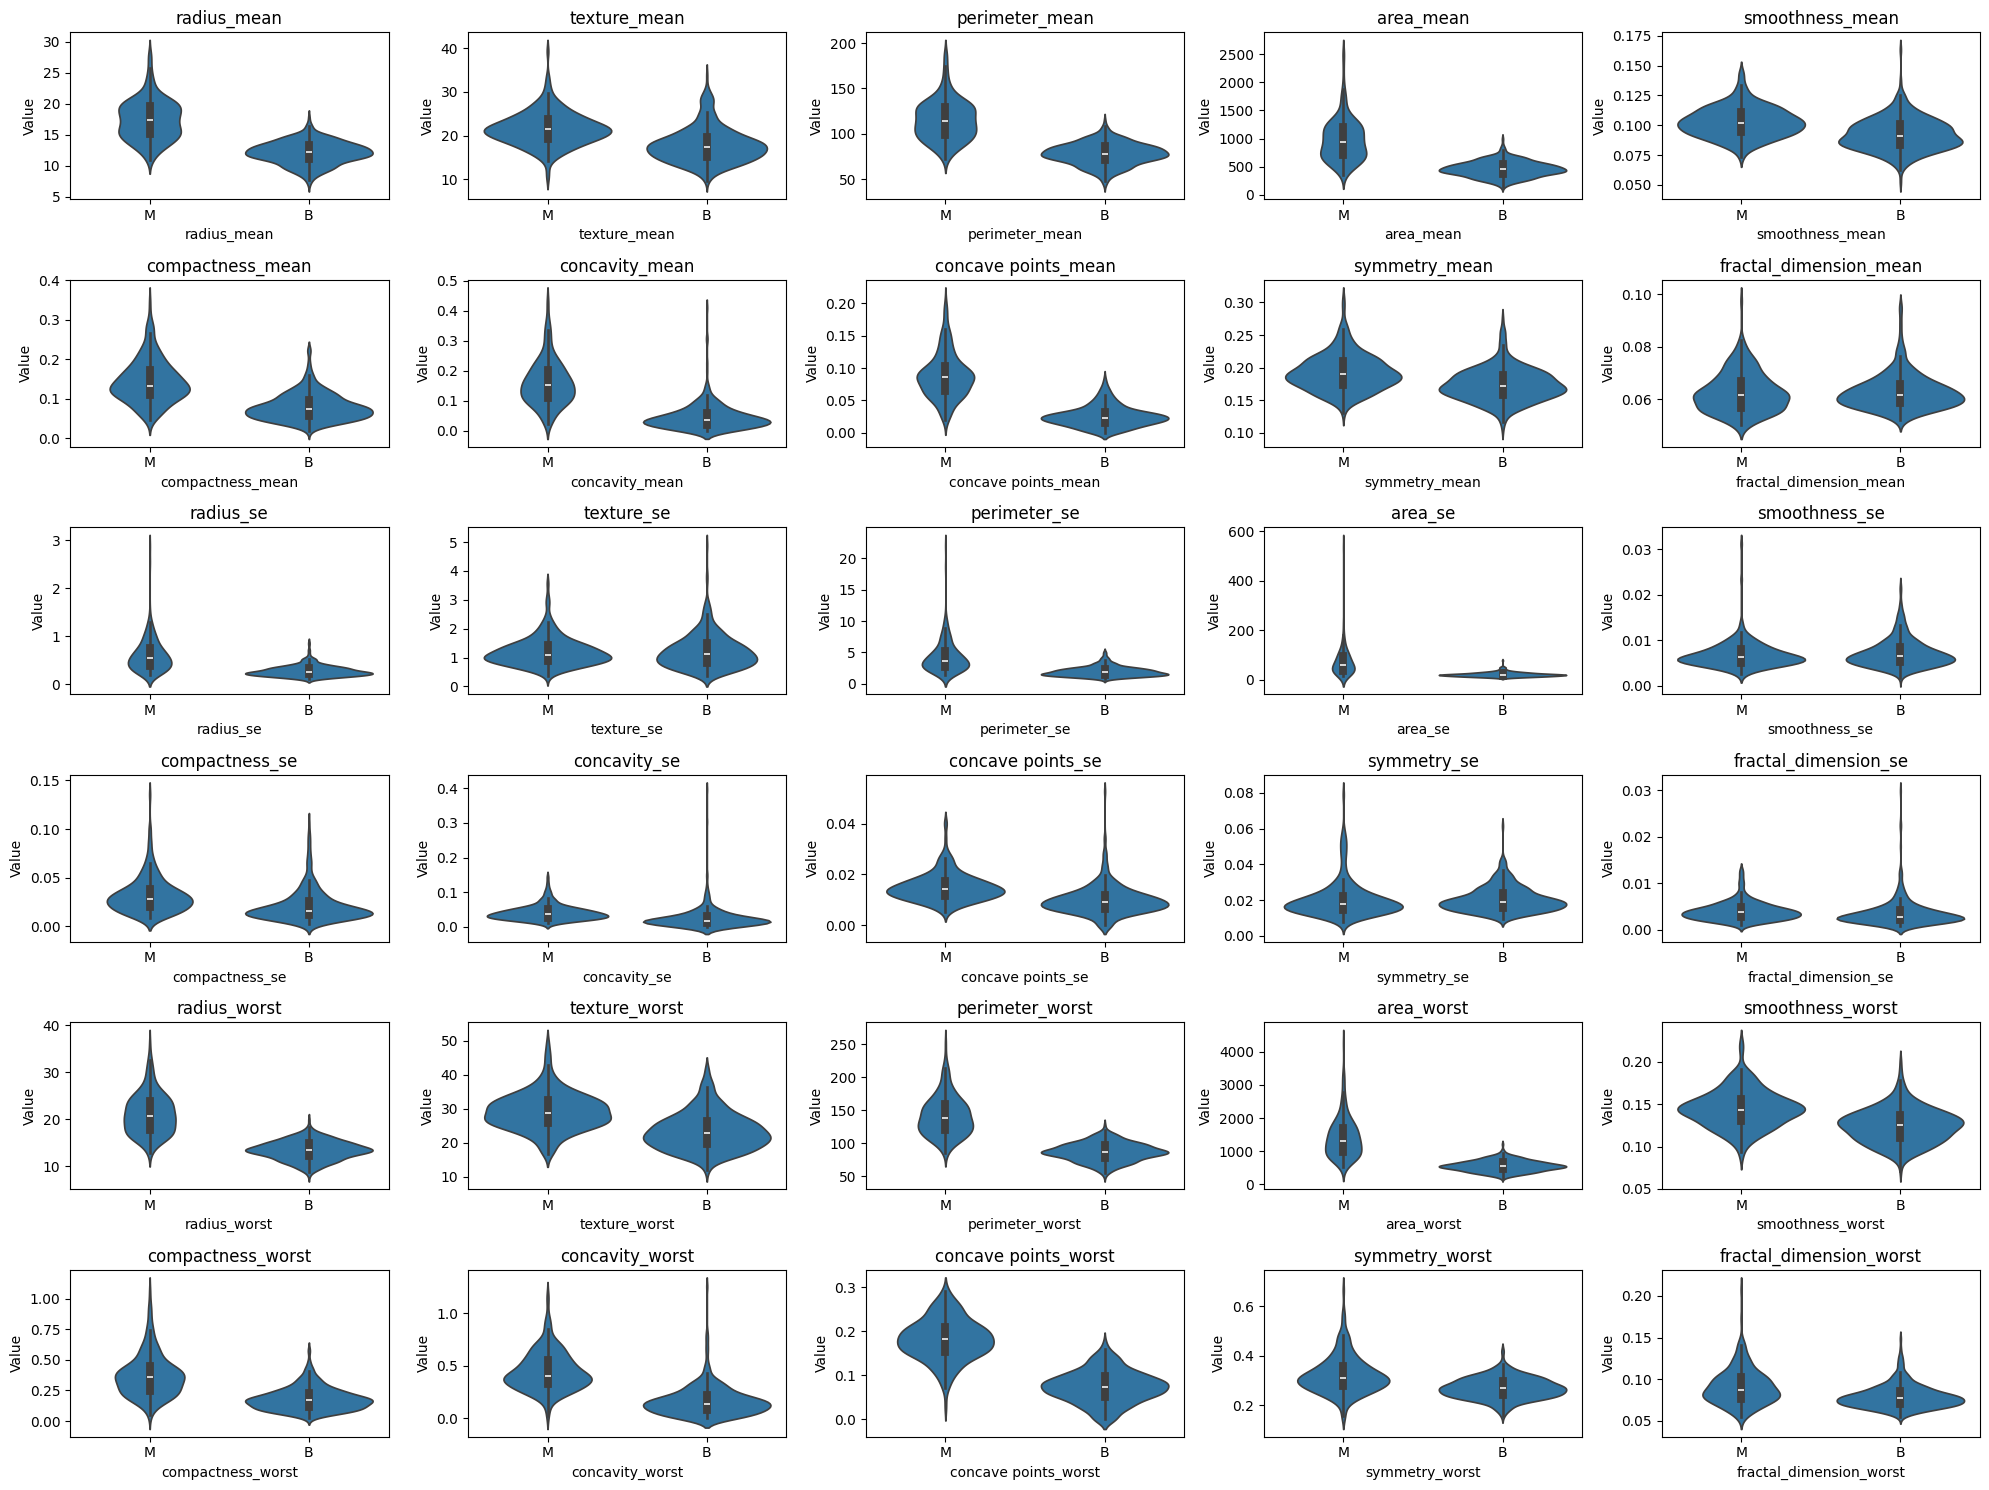

In [12]:
import seaborn as sns 

# 바이올린 플롯 시각화
plt.figure(figsize=(20, 15))

for i, variable in enumerate(variables, 1):
    plt.subplot(6, 5, i)
    sns.violinplot(x='diagnosis', y=variable, data=data)
    plt.title(variable)
    plt.xlabel(variable)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

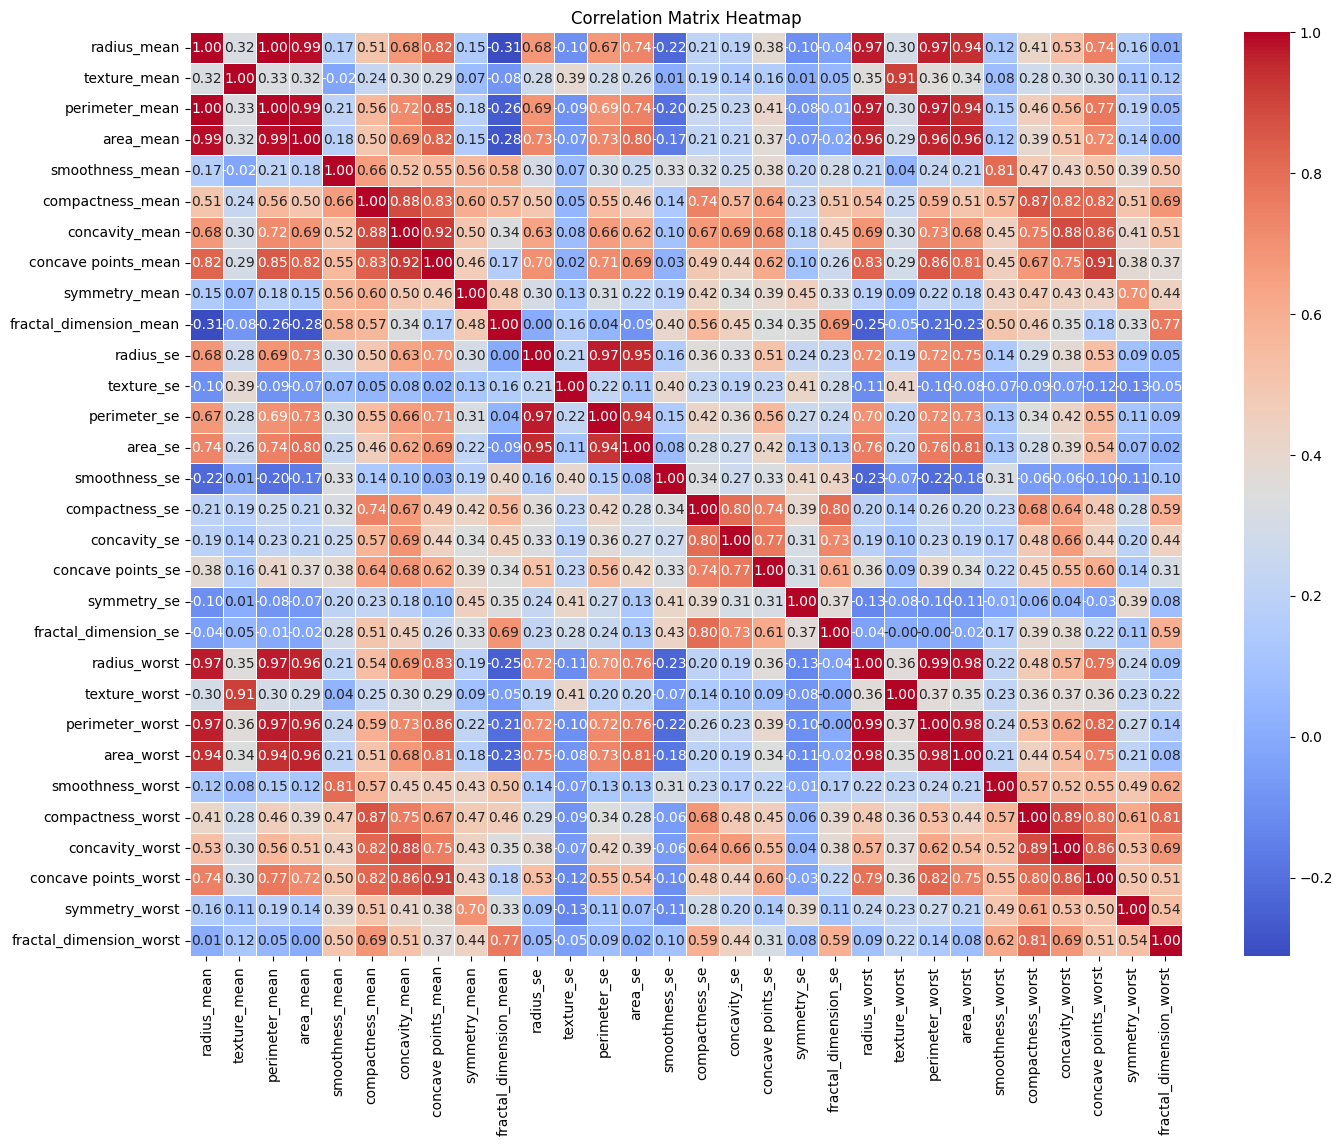

In [13]:
# diagnosis 열을 제외한 나머지 수치형 변수들만 추출하여 상관관계 계산
correlation_matrix = data.iloc[:, 2:].corr()

# 히트맵 시각화
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
